In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.30)

### Model Tahmin

In [4]:
rf_model=RandomForestClassifier().fit(X_train,y_train)

In [5]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\sevva\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" fo

In [6]:
y_pred=rf_model.predict(X_test)

In [7]:
accuracy_score(y_test,y_pred)

0.7489177489177489

### Model Tuning

In [8]:
rf=RandomForestClassifier()

In [15]:
rf_params={"n_estimators":[10,30,1000,100],
"max_depth":[2,5,10,30],"min_samples_split":[3,10,20,100]
}

In [16]:
rf_cv_model=GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [39]:
rf_cv_model.best_params_

{'max_depth': 30, 'min_samples_split': 3, 'n_estimators': 30}

In [46]:
rf_model_tuned=RandomForestClassifier(max_depth=30,min_samples_split=3,n_estimators=30).fit(X_train,y_train)

In [47]:
y_pred=rf_model_tuned.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred)

0.7532467532467533

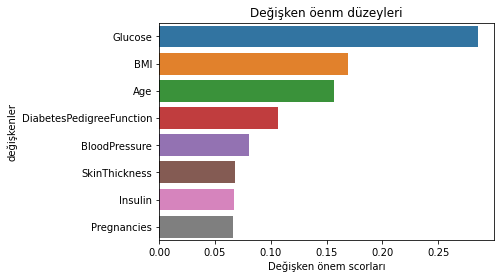

In [49]:
feature_imp=pd.Series(rf_model_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)

import seaborn as sns
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken önem scorları")
plt.ylabel("değişkenler")
plt.title("Değişken öenm düzeyleri")
plt.show()